In [2]:
! pip install Sastrawi
! pip install tqdm
! pip install indonesian-number-normalizer

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from indonesian_number_normalizer import create_normalizer
from tqdm import tqdm


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
normalizer = create_normalizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu.csv')
df

,Title,Content,Sumber,Link,Created_at,label
0,Apakah Eropa Kembali Akan Dilanda Krisis Moneter?,Janji-janji pemilu yang diberikan oleh kubu sa...,Detik,https://news.detik.com/dw/d-7413130/apakah-ero...,"Jumat, 28 Jun 2024 13:49 WIB",positif
1,"Krisis Moneter: Pengertian, Penyebab, dan Damp...",Krisis moneter yang melanda Indonesia pada tah...,Detik,https://finance.detik.com/moneter/d-7090380/kr...,"Kamis, 14 Des 2023 19:45 WIB",negatif
2,"Prabowo Bicara Pertahanan Ekonomi, Ungkit Kris...",Bakal capres Prabowo Subianto menyampaikan pem...,Detik,https://news.detik.com/pemilu/d-7026179/prabow...,"Rabu, 08 Nov 2023 18:01 WIB",positif
3,Sejarah Budi Daya Bunga Kota Batu dan Krisis M...,"Sebelum dikenal sebagai Kota Wisata, masyaraka...",Detik,https://www.detik.com/jatim/wisata/d-7079713/s...,"Jumat, 08 Des 2023 20:08 WIB",positif
4,Memori Taman Puring: Tempat Para Korban PHK Er...,"Terletak di kawasan Kebayoran Baru, Jakarta Se...",Detik,https://finance.detik.com/berita-ekonomi-bisni...,"Jumat, 22 Sep 2023 08:39 WIB",negatif
...,...,...,...,...,...,...
1545,"Resesi Sudah Hampir Pasti, Bakal Separah 1998 ...","Jakarta, CNBC Indonesia - Menteri Keuangan Sri...",CNBC,https://www.cnbcindonesia.com/news/20220927112...,9/27/2022 12:30,negatif
1546,"7 Negara di Ujung Tanduk, Inflasi Tinggi & Ter...","Jakarta, CNBC Indonesia - Krisis global yang t...",CNBC,https://www.cnbcindonesia.com/news/20220913080...,9/13/2022 8:20,negatif
1547,"Dunia di Bibir Jurang Krisis, Lebih Ngeri dari...","Jakarta, CNBC Indonesia - Lonjakan inflasi dan...",CNBC,https://www.cnbcindonesia.com/news/20220621124...,6/21/2022 14:55,negatif
1548,"Jokowi Cemaskan Resesi, Indonesia Bakal Kena?","Jakarta, CNBC Indonesia - Presiden Joko Widodo...",CNBC,https://www.cnbcindonesia.com/news/20220511142...,5/11/2022 16:20,negatif


In [4]:
df = df[['Title', 'Content', 'Created_at', 'label']]

In [5]:
df = df.drop_duplicates(subset=['Content', 'label'])
print(f"Dataset setelah dibersihkan memiliki {len(df)} baris")

Dataset setelah dibersihkan memiliki 1339 baris


In [6]:
df

,Title,Content,Created_at,label
0,Apakah Eropa Kembali Akan Dilanda Krisis Moneter?,Janji-janji pemilu yang diberikan oleh kubu sa...,"Jumat, 28 Jun 2024 13:49 WIB",positif
1,"Krisis Moneter: Pengertian, Penyebab, dan Damp...",Krisis moneter yang melanda Indonesia pada tah...,"Kamis, 14 Des 2023 19:45 WIB",negatif
2,"Prabowo Bicara Pertahanan Ekonomi, Ungkit Kris...",Bakal capres Prabowo Subianto menyampaikan pem...,"Rabu, 08 Nov 2023 18:01 WIB",positif
3,Sejarah Budi Daya Bunga Kota Batu dan Krisis M...,"Sebelum dikenal sebagai Kota Wisata, masyaraka...","Jumat, 08 Des 2023 20:08 WIB",positif
4,Memori Taman Puring: Tempat Para Korban PHK Er...,"Terletak di kawasan Kebayoran Baru, Jakarta Se...","Jumat, 22 Sep 2023 08:39 WIB",negatif
...,...,...,...,...
1536,"Meski Dilanda Demo, Rupiah Menguat 3 Hari vs R...","Jakarta, CNBC Indonesia - Nilai tukar rupiah m...",10/7/2020 19:15,positif
1537,"Cadev RI Anjlok & Demo, Bikin Rupiah KO vs Dol...","Jakarta, CNBC Indonesia - Nilai tukar rupiah m...",10/7/2020 17:12,negatif
1540,"Muncul Tanda-Tanda Ekonomi RI Terancam Gawat, ...","Jakarta, CNBC Indonesia - Kondisi ekonomi RI d...",10/5/2024 21:45,positif
1546,"7 Negara di Ujung Tanduk, Inflasi Tinggi & Ter...","Jakarta, CNBC Indonesia - Krisis global yang t...",9/13/2022 8:20,negatif


PRE-PROCESSING DATA

In [7]:
def cleaning(teks):
    if not isinstance(teks, str):
        return ""
    teks = re.sub(r'<.*?>', ' ', teks)
    teks = re.sub(r'https?://\S+|www\.\S+', ' ', teks)
    teks = re.sub(r'ADVERTISEMENT.*?CONTENT', ' ', teks, flags=re.IGNORECASE | re.DOTALL)
    teks = re.sub(r'[^\w\s\d]', ' ', teks)
    teks = re.sub(r'\s+', ' ', teks).strip()
    return teks
df['cleaned_text'] = df['Content'].fillna('').apply(cleaning)

In [8]:
def case_folding(teks):
    return teks.lower()
df['case_folded_text'] = df['cleaned_text'].apply(case_folding)

In [9]:
def normalisasi(teks):
    # Normalisasi angka (misalnya "100 juta" menjadi "seratus juta")
    try:
        # Gunakan normalize_text dari instance normalizer
        teks = normalizer.normalize_text(teks)
    except Exception as e:
        print(f"Error saat normalisasi angka: {e}")
        pass
    slang_dict = {
        'dgn': 'dengan',
        'tdk': 'tidak',
        'tsb': 'tersebut',
        'utk': 'untuk',
        'spy': 'supaya',
        'krn': 'karena',
        'jg': 'juga',
        'bs': 'bisa',
        'sdh': 'sudah',
        'blm': 'belum',
        'org': 'orang',
        'yg': 'yang',
        'sy': 'saya',
        'dlm': 'dalam',
        'pd': 'pada',
        'dr': 'dari',
        'kmrn': 'kemarin',
        'skrg': 'sekarang',
        'hrs': 'harus',
        'msk': 'masuk',
        'trs': 'terus',
        'tp': 'tapi',
        'kalo': 'kalau',
        'gak': 'tidak',
        'ga': 'tidak',
        'ngga': 'tidak',
        'gk': 'tidak',
        'thn': 'tahun',
        'bln': 'bulan',
        'sblm': 'sebelum',
        'stlh': 'setelah',
        'milyar': 'miliar',
        'trilliun': 'triliun',
        'jt': 'juta',
        'rb': 'ribu',
        '%': 'persen',
        'usd': 'dolar amerika',
        'rupiah': 'rupiah',
        'rp': 'rupiah',
        ',': 'koma',
    }
    
    # Buat pattern regex untuk seluruh kamus sekaligus (lebih efisien)
    pattern = r'\b(' + '|'.join(slang_dict.keys()) + r')\b'
    
    # Fungsi replacement yang menggunakan kamus
    def replace_match(match):
        return slang_dict[match.group(0)]
    
    # Ganti semua kata slang dalam satu kali proses
    return re.sub(pattern, replace_match, teks)
df['normalized_text'] = df['case_folded_text'].apply(normalisasi)

In [10]:
def tokenzing(teks):
    return word_tokenize(teks)
df['tokens'] = df['normalized_text'].apply(tokenzing)

In [11]:
indo_stopwords = set(stopwords.words('indonesian'))
tambahan_stopwords = {
    'ya', 'juga', 'dari', 'di', 'ke', 'pada', 'untuk', 'bagi', 'dan', 'atau', 
    'tapi', 'namun', 'dengan', 'secara', 'oleh', 'karena', 'sehingga', 'agar',
    'sebab', 'jika', 'bila', 'adalah', 'ini', 'itu', 'detik', 'kata', 'dalam',
    'saat', 'akan', 'tidak', 'yang', 'belum', 'sudah', 'telah', 'bisa', 'dapat', 
    'nya', 'pak', 'bu', 'hal', 'pun'
}
indo_stopwords.update(tambahan_stopwords)
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in indo_stopwords]
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]
df['stemmed_tokens'] = [stemming(tokens) for tokens in tqdm(df['filtered_tokens'], desc="Stemming")]
df['stemmed_text'] = df['stemmed_tokens'].apply(lambda x: ' '.join(x))

Stemming: 100%|██████████| 1339/1339 [18:08<00:00,  1.23it/s] 


In [14]:
df['processed_content'] = df['stemmed_text']
display(df[['Title', 'stemmed_text', 'Created_at', 'label']].head())
#df_display = df[['Title', 'processed_content', 'Created_at', 'label']]
#print(df_display.head())

,Title,stemmed_text,Created_at,label
0,Apakah Eropa Kembali Akan Dilanda Krisis Moneter?,janji janji milu kubu sayap kanan sayap kiri p...,"Jumat, 28 Jun 2024 13:49 WIB",positif
1,"Krisis Moneter: Pengertian, Penyebab, dan Damp...",krisis moneter landa indonesia ribu sembilan r...,"Kamis, 14 Des 2023 19:45 WIB",negatif
2,"Prabowo Bicara Pertahanan Ekonomi, Ungkit Kris...",capres prabowo subianto pikir polemik moneter ...,"Rabu, 08 Nov 2023 18:01 WIB",positif
3,Sejarah Budi Daya Bunga Kota Batu dan Krisis M...,kenal kota wisata masyarakat kota batu tani me...,"Jumat, 08 Des 2023 20:08 WIB",positif
4,Memori Taman Puring: Tempat Para Korban PHK Er...,letak kawasan kebayoran jakarta selatan taman ...,"Jumat, 22 Sep 2023 08:39 WIB",negatif


In [15]:
preprocessing_new_file = r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_preprocessing.csv'
preprocessing_new_columns = ['Title', 'Content', 'stemmed_text', 'Created_at', 'label']
df[preprocessing_new_columns].to_csv(preprocessing_new_file, index=False)
print(f"Hasil preprocessing berita terkini disimpan ke {preprocessing_new_file}")

Hasil preprocessing berita terkini disimpan ke D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_preprocessing.csv


PENGELOMPOKAN FAKTOR

In [16]:
kata_kunci = {
    'suku_bunga': [
        # Kata kunci spesifik
        'suku bunga', 'interest rate', 'bi rate', 'bi7drrr', 'bank sentral', 
        'bank indonesia', 'bi', 'ojk', 'bank', 'inflasi', 'deflasi', 'yield', 
        'obligasi', 'federal reserve', 'deposito', 'kpr', 'tabungan', 'kredit', 
        'pinjaman', 'cicilan', 'dpk', 'ldr', 'blr', 'diskonto',
        
        # Tambahan kata kunci pasar modal
        'ihsg', 'indeks harga saham gabungan', 'bei', 'bursa efek', 'saham', 
        'reksadana', 'obligasi', 'pasar modal', 'pasar saham', 'pasar uang',
        'idx', 'composite index', 'jakarta composite index', 'jci',
        
        # Frasa kontekstual untuk suku bunga
        'bunga kredit', 'bunga pinjaman', 'bunga acuan', 'bunga bank',
        'bunga naik', 'bunga turun', 'bunga tetap', 'kebijakan moneter',
        'pemangkasan bunga', 'kenaikan bunga', 'penurunan bunga', 'fed rate',
        'the fed', 'tingkat bunga', 'acuan moneter', 'surat utang',
        'likuiditas bank', 'dana pihak ketiga', 'kredit macet',
        'bunga simpanan', 'bunga deposito', 'bi 7 day', 'bi7day',
        
        # Frasa dengan kata umum dalam konteks moneter
        'suku bunga naik', 'suku bunga turun', 'inflasi naik', 'inflasi turun',
        'kredit naik', 'kredit turun', 'bank sentral', 'bank tahan suku bunga',
        'persen bunga', 'basis poin bunga', 'persentase kredit',
        'persen inflasi', 'rasio kredit', 'tingkat kredit',
        'rasio pinjaman', 'tingkat pinjaman', 'anggaran moneter',
        'bps inflasi', 'persentase inflasi', 'ihsg naik', 'ihsg turun', 
        'ihsg kuat', 'ihsg lemah', 'indeks saham', 'indeks pasar'
    ],
    
    'impor': [
        # Kata kunci spesifik
        'impor', 'import', 'importir', 'bea masuk', 'pelabuhan', 'bea cukai', 'bongkar muat',
        'kontainer', 'container', 'harmonisasi tarif', 'barang impor', 'non migas', 'migas',
        'barang modal', 'faktor produksi',
        
        # Frasa kontekstual untuk impor
        'tarif impor', 'pajak impor', 'komoditas impor', 'produk impor',
        'ketergantungan impor', 'pembatasan impor', 'larangan impor',
        'kuota impor', 'izin impor', 'nilai impor', 'volume impor',
        'peraturan impor', 'izin impor', 'dokumen impor',
        'substitusi impor', 'neraca impor', 'bea impor',
        'kebijakan impor', 'hambatan impor', 'proteksi impor',
        
        # Frasa spesifik produk
        'impor beras', 'impor gula', 'impor daging', 'impor bbm', 
        'impor gandum', 'impor kedelai', 'impor bawang', 'impor garam', 
        'impor jagung', 'impor bahan pangan', 'impor bahan baku',
        'impor bahan bakar', 'impor minyak', 'impor gas',
        
        # Frasa konteks ekonomi internasional
        'neraca perdagangan', 'defisit perdagangan', 'surplus perdagangan',
        'perdagangan bilateral', 'perjanjian perdagangan',
        'komoditas luar negeri', 'belanja luar negeri', 'pembelian luar negeri'
    ],
    
    'ekspor': [
        # Kata kunci spesifik
        'ekspor', 'export', 'eksportir', 'komoditas ekspor', 'non migas', 'migas',
        'barang jadi', 'komoditas', 'fob', 'cpo', 'produk jadi', 'hilirisasi',
        'kepabeanan', 'pengapalan', 'perdagangan luar negeri',
        
        # Frasa kontekstual untuk ekspor
        'produk ekspor', 'nilai ekspor', 'volume ekspor', 'pasar ekspor',
        'tujuan ekspor', 'pertumbuhan ekspor', 'penurunan ekspor', 
        'kenaikan ekspor', 'kebijakan ekspor', 'izin ekspor',
        'dokumen ekspor', 'larangan ekspor', 'pembatasan ekspor',
        'insentif ekspor', 'promosi ekspor', 'diversifikasi ekspor',
        
        # Frasa spesifik produk
        'ekspor sawit', 'ekspor batu bara', 'ekspor nikel', 'ekspor karet',
        'ekspor tekstil', 'ekspor manufaktur', 'ekspor pertanian',
        'ekspor perikanan', 'ekspor kayu', 'ekspor mineral', 'ekspor logam',
        'ekspor produk jadi', 'ekspor komoditas unggulan',
        
        # Frasa konteks ekonomi internasional
        'perdagangan internasional', 'neraca perdagangan', 'surplus perdagangan',
        'defisit perdagangan', 'devisa negara', 'penghasil devisa', 'penerimaan negara',
        'hambatan ekspor', 'tarif ekspor', 'proteksionisme', 'pasar global',
        'pasar dunia', 'pengiriman barang', 'negara tujuan ekspor'
    ]
}

In [17]:
stemmed_kata_kunci = {}
for kategori, keywords in kata_kunci.items():
    stemmed_keywords = []
    for keyword in keywords:
        if ' ' in keyword:  # Kata majemuk
            stemmed_parts = [stemmer.stem(word) for word in keyword.split()]
            stemmed_keywords.append(' '.join(stemmed_parts))
        else:  # Kata tunggal
            stemmed_keywords.append(stemmer.stem(keyword))
    stemmed_kata_kunci[kategori] = stemmed_keywords

kata_umum_konteks = {
    'naik': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ekonomi', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'turun': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ekonomi', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'tetap': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'persen': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ihsg', 'indeks', 'saham'],
    'tingkat': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'ihsg', 'indeks', 'saham'],
    'nilai': ['impor', 'ekspor', 'perdagang', 'komoditas', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'masuk': ['bea', 'impor', 'barang', 'komoditas'],
    'kuota': ['impor', 'ekspor', 'perdagang', 'komoditas'],
    'pasar': ['ekspor', 'impor', 'global', 'dunia', 'komoditas', 'modal', 'saham', 'uang'],
    'harmonisasi': ['tarif', 'impor', 'perdagang', 'bea'],
    'kapal': ['ekspor', 'perdagang', 'komoditas', 'pengapal'],
    'terima': ['devisa', 'negara', 'ekspor'],
    'hilir': ['ekspor', 'komoditas', 'produk'],
    'kuat': ['ihsg', 'saham', 'indeks', 'pasar', 'rupiah'],
    'lemah': ['ihsg', 'saham', 'indeks', 'pasar', 'rupiah']
}
# Fungsi untuk memeriksa apakah teks mengandung kata kunci dari kategori tertentu
# Perbaikan: Menggunakan regex word boundary untuk pencocokan kata yang lebih akurat
def cek_kategori(teks, kategori_keywords):
    matches = []
    for keyword in kategori_keywords:
        if ' ' in keyword:  # Kata majemuk - cek sebagai frasa
            if keyword in teks:
                matches.append(keyword)
        else:  # Kata tunggal - gunakan regex dengan word boundary
            pattern = r'\b' + re.escape(keyword) + r'\b'
            if re.search(pattern, teks):
                matches.append(keyword) 
    return matches

# Kategorisasi berita dengan pencatatan kata kunci yang cocok
for kategori, keywords in stemmed_kata_kunci.items():
    df[f"{kategori}_keywords"] = df['stemmed_text'].apply(lambda x: cek_kategori(x, keywords))
    df[kategori] = df[f"{kategori}_keywords"].apply(lambda x: len(x) > 0)

In [23]:
#Membuat kolom faktor
def get_faktor(row):
    faktor = []
    for kategori in stemmed_kata_kunci.keys():
        if row[kategori]:
            faktor.append(kategori)
    return faktor
df['faktor'] = df.apply(get_faktor, axis=1)

# Menambahkan kolom yang mencatat kata kunci spesifik yang ditemukan
def get_keyword_details(row):
    details = {}
    for kategori in stemmed_kata_kunci.keys():
        if row[kategori] and len(row[f"{kategori}_keywords"]) > 0:
            details[kategori] = row[f"{kategori}_keywords"]
    return details
df['keyword_details'] = df.apply(get_keyword_details, axis=1)

print("\nJumlah berita per kategori:")
for kategori in stemmed_kata_kunci.keys():
    jumlah = df[kategori].sum()
    print(f"{kategori}: {jumlah} berita")


Jumlah berita per kategori:
suku_bunga: 1130 berita
impor: 438 berita
ekspor: 569 berita


In [24]:
# Distribusi detail
print("\nDistribusi detail kategori:")
print(f"Hanya suku_bunga: {len(df[(df['suku_bunga']==True) & (df['impor']==False) & (df['ekspor']==False)])}")
print(f"Hanya impor: {len(df[(df['suku_bunga']==False) & (df['impor']==True) & (df['ekspor']==False)])}")
print(f"Hanya ekspor: {len(df[(df['suku_bunga']==False) & (df['impor']==False) & (df['ekspor']==True)])}")
print(f"suku_bunga dan impor: {len(df[(df['suku_bunga']==True) & (df['impor']==True) & (df['ekspor']==False)])}")
print(f"suku_bunga dan ekspor: {len(df[(df['suku_bunga']==True) & (df['impor']==False) & (df['ekspor']==True)])}")
print(f"impor dan ekspor: {len(df[(df['suku_bunga']==False) & (df['impor']==True) & (df['ekspor']==True)])}")
print(f"semua kategori: {len(df[(df['suku_bunga']==True) & (df['impor']==True) & (df['ekspor']==True)])}")


Distribusi detail kategori:
Hanya suku_bunga: 541
Hanya impor: 21
Hanya ekspor: 23
suku_bunga dan impor: 81
suku_bunga dan ekspor: 210
impor dan ekspor: 38
semua kategori: 298


In [25]:
df['jumlah_kategori'] = df[list(stemmed_kata_kunci.keys())].sum(axis=1)
print(f"\nBerita yang tidak masuk kategori: {len(df[df['jumlah_kategori'] == 0])}")
print(f"Berita yang masuk 1 kategori: {len(df[df['jumlah_kategori'] == 1])}")
print(f"Berita yang masuk 2 kategori: {len(df[df['jumlah_kategori'] == 2])}")
print(f"Berita yang masuk 3 kategori: {len(df[df['jumlah_kategori'] == 3])}")


Berita yang tidak masuk kategori: 127
Berita yang masuk 1 kategori: 585
Berita yang masuk 2 kategori: 329
Berita yang masuk 3 kategori: 298


In [26]:
# Menghapus berita yang tidak masuk ke kategori apapun
df_filtered = df[df['jumlah_kategori'] > 0].copy()
print(f"Jumlah berita setelah menghapus yang tidak berkategori: {len(df_filtered)}")

Jumlah berita setelah menghapus yang tidak berkategori: 1212


In [27]:
# # Menyimpan hasil kategori ke file CSV baru
# output_file = 'berita_terkategori.csv'
# # Mengonversi kolom faktor dan keyword_details (dict/list) menjadi string agar bisa disimpan di CSV
# df_filtered['faktor_str'] = df_filtered['faktor'].apply(lambda x: str(x))
# df_filtered['keyword_details_str'] = df_filtered['keyword_details'].apply(lambda x: str(x))
# df_output = df_filtered[['Title', 'Content', 'Created_at', 'label', 'faktor_str', 'jumlah_kategori', 'keyword_details_str']]
# df_output.to_csv(output_file, index=False)
# print(f"Hasil pengelompokan telah disimpan ke {output_file}")

In [28]:
preprocessing_file = (r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv')
df_filtered['faktor_str'] = df_filtered['faktor'].apply(lambda x: str(x))
preprocessing_columns = ['Title', 'Content','stemmed_text', 'faktor_str', 'label', 'Created_at']
df_filtered[preprocessing_columns].to_csv(preprocessing_file, index=False)
print(f"Hasil preprocessing (hanya berita berkategori) disimpan ke {preprocessing_file}")

Hasil preprocessing (hanya berita berkategori) disimpan ke D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv


In [29]:
# for kategori in stemmed_kata_kunci.keys():
#     kategori_file = f'berita_{kategori}.csv'
#     df_kategori = df[df[kategori]]
#     df_kategori['faktor_str'] = df_kategori['faktor'].apply(lambda x: str(x))
#     df_kategori['keyword_details_str'] = df_kategori['keyword_details'].apply(lambda x: str(x))
#     df_kategori[['Title', 'Content', 'Created_at', 'label', 'faktor_str', 'keyword_details_str']].to_csv(kategori_file, index=False)
#     print(f"Berita kategori {kategori} disimpan ke {kategori_file}")

In [30]:
print("\nSampel berita dari setiap kategori:")
for kategori in stemmed_kata_kunci.keys():
    print(f"\n=== SAMPEL BERITA {kategori.upper()} ===")
    if df[df[kategori]].shape[0] > 0:
        sampel = df[df[kategori]].sample(min(3, df[df[kategori]].shape[0]))
        for idx, row in sampel.iterrows():
            print(f"Judul: {row['Title']}")
            print(f"Tanggal: {row['Created_at']}")
            print(f"Label: {row['label']}")
            print(f"Faktor: {row['faktor']}")
            print(f"Kata kunci yang ditemukan: {row['keyword_details']}")
            print("---")
    else:
        print("Tidak ada berita dalam kategori ini.")



Sampel berita dari setiap kategori:

=== SAMPEL BERITA SUKU_BUNGA ===
Judul: Harga Barang Impor Naik Efek Rupiah Melemah, Daya Beli Terancam?
Tanggal: 7/1/2024 11:41
Label: negatif
Faktor: ['suku_bunga', 'impor', 'ekspor']
Kata kunci yang ditemukan: {'suku_bunga': ['suku bunga', 'inflasi', 'the fed'], 'impor': ['impor', 'impor bbm'], 'ekspor': ['ekspor']}
---
Judul: AS Kobarkan Perang Dagang Lawan China, Ini Respons Tak Terduga Beijing
Tanggal: 5/16/2024 8:00
Label: negatif
Faktor: ['suku_bunga', 'impor', 'ekspor']
Kata kunci yang ditemukan: {'suku_bunga': ['obligasi', 'obligasi'], 'impor': ['impor'], 'ekspor': ['ekspor', 'eksportir']}
---
Judul: Inflasi AS Dinanti Pasar, Dolar Dibuka Turun Tipis ke Rp16.390
Tanggal: 6/28/2024 9:08
Label: positif
Faktor: ['suku_bunga']
Kata kunci yang ditemukan: {'suku_bunga': ['suku bunga', 'bank sentral', 'bank', 'inflasi', 'pasar uang', 'bunga acu', 'the fed', 'bank sentral']}
---

=== SAMPEL BERITA IMPOR ===
Judul: Pekan Bergejolak: "Tsunami" Sent

WORD EMBEDDING

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from tqdm import tqdm

In [32]:
! pip install gensim nltk scikit-learn tqdm matplotlib seaborn

In [33]:
from gensim.models import FastText
import nltk
nltk.download('punkt', quiet=True)

True

In [34]:
df = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv')
df

,Title,Content,stemmed_text,faktor_str,label,Created_at
0,Apakah Eropa Kembali Akan Dilanda Krisis Moneter?,Janji-janji pemilu yang diberikan oleh kubu sa...,janji janji milu kubu sayap kanan sayap kiri p...,['suku_bunga'],positif,"Jumat, 28 Jun 2024 13:49 WIB"
1,"Krisis Moneter: Pengertian, Penyebab, dan Damp...",Krisis moneter yang melanda Indonesia pada tah...,krisis moneter landa indonesia ribu sembilan r...,['suku_bunga'],negatif,"Kamis, 14 Des 2023 19:45 WIB"
2,Kebijakan Prabowo Hapus Utang UMKM Pertanian A...,Kebijakan Presiden RI Prabowo Subianto untuk m...,bijak presiden ri prabowo subianto hapus utang...,['suku_bunga'],positif,"Rabu, 06 Nov 2024 12:35 WIB"
3,Ekonom Sebut KUR Tak Termasuk Utang UMKM yang ...,Pemerintah telah menerbitkan Peraturan Pemerin...,perintah terbit atur perintah nomor puluh tuju...,['suku_bunga'],positif,"Sabtu, 16 Nov 2024 11:11 WIB"
4,Meredam Dampak Krisis Seperti 1998 di Balik Ba...,Pemerintah mewajibkan bank membayar premi untu...,perintah wajib bank bayar premi dana program r...,['suku_bunga'],positif,"Rabu, 21 Jun 2023 07:45 WIB"
...,...,...,...,...,...,...
1207,"Harga Bensin Tembus Rp 24.000/liter, Turki Ken...","Jakarta, CNBC Indonesia - Turki mengalami 'tsu...",jakarta cnbc indonesia turki alami tsunami inf...,"['suku_bunga', 'impor', 'ekspor']",positif,6/30/2022 13:30
1208,"Cadev RI Anjlok & Demo, Bikin Rupiah KO vs Dol...","Jakarta, CNBC Indonesia - Nilai tukar rupiah m...",jakarta cnbc indonesia nilai tukar rupiah lema...,"['suku_bunga', 'impor']",negatif,10/7/2020 17:12
1209,"Muncul Tanda-Tanda Ekonomi RI Terancam Gawat, ...","Jakarta, CNBC Indonesia - Kondisi ekonomi RI d...",jakarta cnbc indonesia kondisi ekonomi ri nila...,"['suku_bunga', 'impor', 'ekspor']",positif,10/5/2024 21:45
1210,"7 Negara di Ujung Tanduk, Inflasi Tinggi & Ter...","Jakarta, CNBC Indonesia - Krisis global yang t...",jakarta cnbc indonesia krisis global picu pand...,"['suku_bunga', 'impor', 'ekspor']",negatif,9/13/2022 8:20


In [35]:
def tokenize_text(text):
    if isinstance(text, str):
        return text.split()
    return []
tokenized_docs = [tokenize_text(text) for text in df['stemmed_text']]

for i in range(min(5, len(tokenized_docs))):
    print(f"Dokumen {i+1}: {tokenized_docs[i][:10]}...")

Dokumen 1: ['janji', 'janji', 'milu', 'kubu', 'sayap', 'kanan', 'sayap', 'kiri', 'prancis', 'sulit']...
Dokumen 2: ['krisis', 'moneter', 'landa', 'indonesia', 'ribu', 'sembilan', 'ratus', 'sembilan', 'puluh', 'delapan']...
Dokumen 3: ['bijak', 'presiden', 'ri', 'prabowo', 'subianto', 'hapus', 'utang', 'macet', 'usaha', 'mikro']...
Dokumen 4: ['perintah', 'terbit', 'atur', 'perintah', 'nomor', 'puluh', 'tujuh', 'ribu', 'puluh', 'hapus']...
Dokumen 5: ['perintah', 'wajib', 'bank', 'bayar', 'premi', 'dana', 'program', 'restrukturisasi', 'perban', 'prp']...


In [36]:
# Melatih model FastText
vector_size = 100  # dimensi vektor
window = 5         # ukuran jendela konteks
min_count = 2      # frekuensi kata minimum
workers = 4        # jumlah thread
sg = 1             # Skip-gram (1) vs CBOW (0)
epochs = 20        # jumlah epoch pelatihan

# Latih model
model_ft = FastText(
    tokenized_docs,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers,
    sg=sg,
    epochs=epochs
)

In [37]:
# memeriksa hasil model
kata_kunci = ['krisis', 'ekonomi', 'moneter', 'inflasi', 'ekspor', 'impor', 'bunga'] #periksa kata yang mirip
print("\nKata-kata yang serupa dengan kata kunci:")
for kata in kata_kunci:
    try:
        similar_words = model_ft.wv.most_similar(kata, topn=5)
        print(f"\nKata yang mirip dengan '{kata}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    except KeyError:
        print(f"\n'{kata}' tidak ditemukan dalam kosakata model")


Kata-kata yang serupa dengan kata kunci:

Kata yang mirip dengan 'krisis':
  delapankrisis: 0.7993
  krismo: 0.7909
  krismon: 0.7561
  crisis: 0.7269
  traumatis: 0.6283

Kata yang mirip dengan 'ekonomi':
  geoekonomi: 0.7655
  tumbuh: 0.6747
  makroekonomi: 0.6655
  imfmenurut: 0.6444
  wb: 0.6199

Kata yang mirip dengan 'moneter':
  nonmoneter: 0.6638
  monetari: 0.6326
  monetary: 0.5657
  krismon: 0.5633
  kebijakanpada: 0.5626

Kata yang mirip dengan 'inflasi':
  asinflasi: 0.8886
  disinflasi: 0.8050
  landai: 0.7226
  hiperinflasi: 0.7130
  inti: 0.7076

Kata yang mirip dengan 'ekspor':
  eksportir: 0.7204
  eksporpelemahan: 0.6790
  nonmigas: 0.6760
  impor: 0.6152
  migas: 0.5818

Kata yang mirip dengan 'impor':
  imporhal: 0.7432
  import: 0.7257
  importer: 0.6846
  importasi: 0.6838
  importir: 0.6678

Kata yang mirip dengan 'bunga':
  suku: 0.9013
  acu: 0.7003
  cbrt: 0.6890
  agresif: 0.6857
  mangkas: 0.6719


In [38]:
# konversi dokumen ke vektor
def get_document_vector(doc_tokens, model):
    """Mengkonversi dokumen (list token) menjadi vektor dengan rata-rata vektor token"""
    vec = np.zeros(model.vector_size)
    count = 0
    for token in doc_tokens:
        try:
            vec += model.wv[token]
            count += 1
        except KeyError:
            continue
    if count > 0:
        vec /= count
    return vec
# konversi dokumen ke vektor
doc_vectors = []
for doc in tqdm(tokenized_docs):
    doc_vectors.append(get_document_vector(doc, model_ft))
# mengubah ke array numpy
doc_vectors = np.array(doc_vectors)
print(f"Bentuk vektor dokumen: {doc_vectors.shape}")

100%|██████████| 1212/1212 [00:01<00:00, 879.07it/s]

Bentuk vektor dokumen: (1212, 100)


In [40]:
# simpan model dan vektor
model_ft.save("model_fasttext_berita.bin")
with open("doc_vectors_fasttext.pkl", "wb") as f:
    pickle.dump(doc_vectors, f)

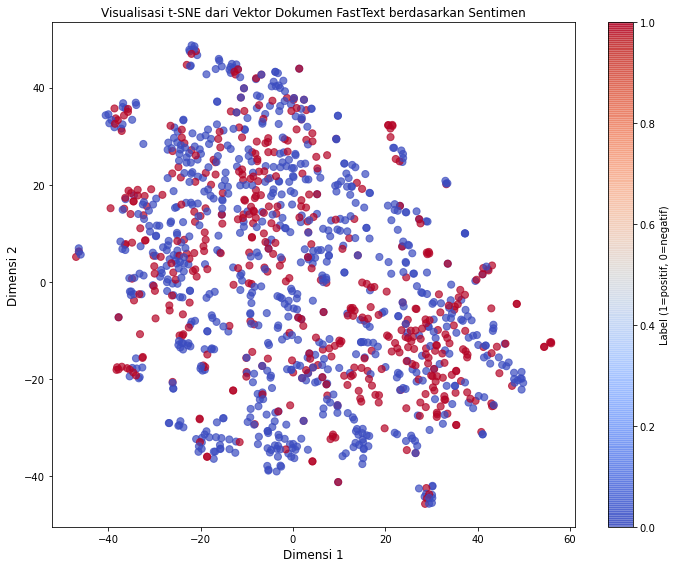

In [41]:
# visualisasi dengan t-sne
from sklearn.manifold import TSNE

label_map = {'positif': 1, 'negatif': 0} #split berdasarkan label sentimen
y = df['label'].map(label_map).values
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
vectors_tsne = tsne.fit_transform(doc_vectors)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    vectors_tsne[:, 0], 
    vectors_tsne[:, 1], 
    c=y, 
    cmap='coolwarm', 
    alpha=0.7,
    s=50
)
plt.colorbar(scatter, label='Label (1=positif, 0=negatif)')
plt.title('Visualisasi t-SNE dari Vektor Dokumen FastText berdasarkan Sentimen', fontsize=12)
plt.xlabel('Dimensi 1', fontsize=12)
plt.ylabel('Dimensi 2', fontsize=12)
plt.tight_layout()
plt.show()